In Deep Learning Section we'll learn techniques to remove the simplifying assumptions we made in the previous section.
- Instead of bag-of-words we'll use word embeddings
- KInstead of Markov assumption, no assumption on how many past words can influence future
- Instead of using linear models like SVD to find hidden factors, we'll use non-linear neural networks

# The Neuron
- we'll revisit the Logistic Regression but from a new perspective
- New perspective is that Log-Reg model is in fact a neuron, and neuron is the basic nbuilding bloc of NNs
- also we formerly didn2t discuss how Log-Reg learns from a dataset it's given
- we'll discuss how it learns
- we'll start by tensorflow syntax for simply fitting a line
- then how to use same syntax to implement Log-Reg
- then why this is a model of a neuron and how this neuron learns?
- what does model.fit( ) actually do? THIS IS IMPORTANT BCZ SOMETIMES IN DL, IT DOES NOT DO WHAT WE WANNA DO,
- IN DL, IT'S IMPORTANT TO MONITOR MODEL'S LEARNING PROGRESS, YOU CANNOT TRUST JUST CALLING MODEL.FIT WILL DO WHAT YOU WANT

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

## GOOGLE who invented the tensorflow recommends actually use of a Keras API unless it's not possible
# some students ask why we always use Keras instead of Tenserflow
# bcz google has stated that this is the correct way to use Tensorflow

2023-06-15 16:34:24.069989: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#next: create a linear reg dataset
N = 100
X = np.random.random(N) * 6 - 3 #uniform random data points between minus three and plus three
y = 0.5 * X - 1 + np.random.randn(N) * 0.5 #create y a function of X, and along with some Gaussian distributed noise
#recall: this is the assumption of linear model

In [3]:
# build model: as you see contains 3 parts: input, dense layer and the model class
# for input we specify that the shape is a tuple containing a single value of 1. bcz our data is one-dimensional? 
# if we had D dimensions we would set this value to D
# later in this course see how it can be multidim
i = Input(shape=(1,))

#next: create a dense layer
#a dense layer basically implements a fine transformation also wrongly sometmies called a linear transformation
# basically it does m * input + b computation, takes the input multiplies by some internarl parameter m and add 
# another internal parameter called b

#input dimensionımıza göre, vector çarpıp a bias of vector de ekleyebilirdi. 
#bu case de input dim 1 olduğu için lineer, and output size is also 1.
x = Dense(1)(i)
#another notice: this use Keras functional API, in other words, although dense object is an object 
#it can also be treated as a function, 
#when we say Dense 1 it creates an object but we can add additional parameters in parantheses since it behaves like a function


model = Model(i, x)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- In the first column we can see each layer along with its type. So we have an input layer followed by a dense. 
- In the second column we can see the shape of the data after going through each layer. It's none, 1 in both cases. Why is it none? Recall, when you do ML, we can have any number of samples. For this notebook we've created 100 samples (did we?), but obviously we want our model to work with other numbers as well. None is like a wild card, so this dimension does not have to take any specific number.
- In the third column, we can see the number of parameters in each layer. Its zero for input layer bcz it has just the input, and two parameters for the dense layer as promised, recall these are the intercept and slope (b and m) of our line

In [6]:
#next: call the compile function which aloows us to specify some important info on how our model will be trained
model.compile(
  loss='mse', #mean squared error
  # next specify the optimizer: optimizer='adam', when your model learn there is this process called gradient descent
    #there a re different flavors of gradient descent, most popular is adam and in these days it's default choice
    # optimizer='adam' 
    #üstteki şekilde de yazabilirsin, o zaman Adam'ın default value'leriyle çalışır
    optimizer=Adam(learning_rate=0.1), #here we'll train an object of Adam explicitly, with a lerning rate = 0.1
    #which is better for this dataset than default value
  metrics=['mae'] #metrics argument allows us to compute more metrics other than loss, 
    #gonna be computed and displayed in each step
    #mae stands for mean absolute error, a bit irrelevant for this case but more relevant for a clssification example
    # where the loss is not the same as the metric we care about. TAM ANLAMADIM
)

#aynı adam'daki gibi loss'u burda string olarak geçirdik ama we can also specify that one as a Keras object
#or we can even write a loss function ourselves

In [7]:
r = model.fit(
  X.reshape(-1, 1), y,
  epochs=200,
  batch_size=32,
)

#now we do the actual training
# the first two argumens X and y are input targets
#notice we reshaped the target to be -1,1. -1 is a wild card
# so this value should just be whatever it is left, after sending the second dimension to be size one
#the reason we do this, currently our data is a 1-d array of size n
# to convert this into the NxD format, we need to make this a 2d array of size nx1

#batch_size allows us to specify how many data points we wanted to be looked at on each step of gradient desent
#bcz sometiems dataset is too big for the memory and not possible to sned a whole dataset at once
## Generally speaking we try to make this value as big as possible without degrading the performance

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 1.1656 - mae: 0.9503
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 0.5974 - mae: 0.6432
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.4061 - mae: 0.5174
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3016 - mae: 0.4415
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.3300 - mae: 0.4609
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3287 - mae: 0.4632
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 0.3039 - mae: 0.4476
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2727 - mae: 0.4161
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2667 - mae: 0.4163
Epoch 10/200
4/4 [==============================] - 0s 12ms/step - loss: 0.2815 - mae: 0.4274
Epoch 11/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2826

4/4 [==============================] - 0s 4ms/step - loss: 0.2684 - mae: 0.4144
Epoch 90/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2841 - mae: 0.4259
Epoch 91/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2848 - mae: 0.4230
Epoch 92/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2681 - mae: 0.4158
Epoch 93/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2845 - mae: 0.4297
Epoch 94/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2701 - mae: 0.4195
Epoch 95/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2863 - mae: 0.4289
Epoch 96/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2790 - mae: 0.4217
Epoch 97/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2740 - mae: 0.4224
Epoch 98/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3016 - mae: 0.4447
Epoch 99/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3155 - ma

4/4 [==============================] - 0s 4ms/step - loss: 0.2747 - mae: 0.4221
Epoch 177/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2670 - mae: 0.4147
Epoch 178/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2678 - mae: 0.4154
Epoch 179/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2812 - mae: 0.4278
Epoch 180/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2767 - mae: 0.4245
Epoch 181/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2720 - mae: 0.4173
Epoch 182/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2690 - mae: 0.4147
Epoch 183/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2701 - mae: 0.4191
Epoch 184/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2801 - mae: 0.4254
Epoch 185/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2640 - mae: 0.4117
Epoch 186/200
4/4 [==============================] - 0s 4ms/step - loss: 0

#### once the training is complete there are some things we should always do bcz as mentioned, we can just simply trust that everything worked the way we wanted in DL.

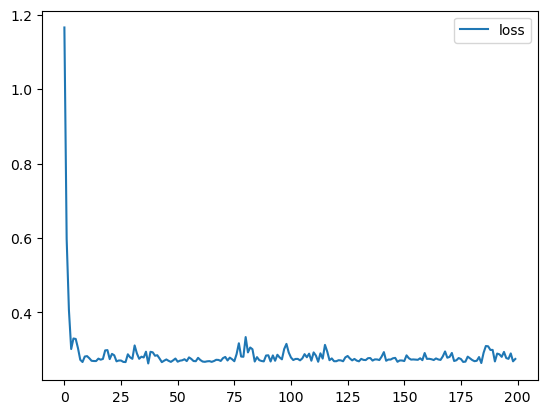

In [15]:
# plot loss per iteration
# as you recall we got this variable r from the previous step (???), 
#this is an object which contains the history of the training process
plt.plot(r.history['loss'], label='loss') #see history attribute contains a key called loss, to see loss per epoch
plt.legend();

#we get a chart where loss starts high and get smaller on eahc step
# to be discussed in more detail later in the course

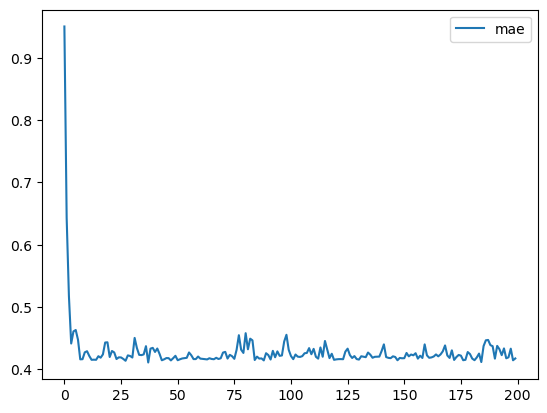

In [16]:
# Plot mae per iteration
plt.plot(r.history['mae'], label='mae') #metrics can also be plotted per epoch
plt.legend();

#as you see the mae per epoch looks pretty much the same as MSE (loss)

1/1 [==============================] - 0s 89ms/step


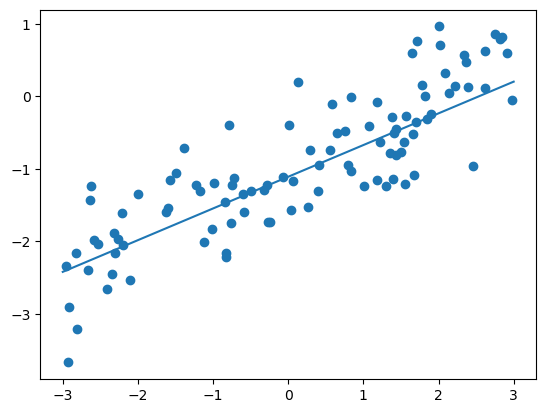

In [17]:
# Make predictions
#create a new set of inputs called Test
Xtest = np.linspace(-3, 3, 20).reshape(-1, 1) #20 evenly spaced points between minus 3 and plus 3
#reshape to be size nx1 acaba Kirill'de yaptığımız 2d array çevirme süreciyle aynı mı?
ptest = model.predict(Xtest)

# plot the original training points along with the text predictions
plt.scatter(X, y) #scatter plot for training points
plt.plot(Xtest, ptest); #line chart for predictions

# as you see we have in fact found the line of best fit which pass through for the training points

In [18]:
#next check the slope and intercept that our model found i.e. parameters
# Check the learned parameters
model.layers

In [19]:
#now get the parameters learnt for our dense layer, which is the layer at position 1
model.layers[1].get_weights()

#this returns 2 np.arrays, the first nparray is a two dimensional 1x1 array as promised.
# this parameter could also be a matrix with multiple inputs and multiple outputs

#the second numpy array, is a 1-d array, which can in general case be a vector in the case where you have multiple outputs
# so we've covered the hidden parameters in our dataset

[array([[0.43724447]], dtype=float32), array([-1.109898], dtype=float32)]